In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
col_names = [
    "white_king_file", "white_king_rank",
    "white_rook_file", "white_rook_rank",
    "black_king_file", "black_king_rank",
    "result"
]
os.chdir(r"C:\Users\klemi\Documents\studia\sem3\twd")
df = pd.read_csv("krkopt.data", names=col_names)

In [ ]:
mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}
for col in ["white_king_file", "white_rook_file", "black_king_file"]:
    df[col.replace('file', 'file_num')] = df[col].map(mapping)

def parse_result(x):
    if x == 'draw': return -1
    if x == 'zero': return 0
    if x == 'one': return 1
    if x == 'two': return 2
    if x == 'three': return 3
    if x == 'four': return 4
    if x == 'five': return 5
    if x == 'six': return 6
    if x == 'seven': return 7
    if x == 'eight': return 8
    if x == 'nine': return 9
    if x == 'ten': return 10
    if x == 'eleven': return 11
    if x == 'twelve': return 12
    if x == 'thirteen': return 13
    if x == 'fourteen': return 14
    if x == 'fifteen': return 15
    if x == 'sixteen': return 16
    return int(x)

df['depth'] = df['result'].apply(parse_result)

#### Pytanie 2

In [ ]:

dx = abs(df['white_king_file_num'] - df['black_king_file_num'])
dy = abs(df['white_king_rank'] - df['black_king_rank'])

df['dist_euclidean'] = np.sqrt(dx**2 + dy**2)
df['dist_manhattan'] = dx + dy
df['dist_chebyshev'] = np.maximum(dx, dy)

#### Pytanie 3

In [6]:
df['bk_dist_edge_x'] = df['black_king_file_num'].apply(lambda x: min(x-1, 8-x))
df['bk_dist_edge_y'] = df['black_king_rank'].apply(lambda x: min(x-1, 8-x))
df['bk_dist_edge'] = df[['bk_dist_edge_x', 'bk_dist_edge_y']].min(axis=1)

In [7]:
df.head(15)

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,white_king_file_num,white_rook_file_num,black_king_file_num,depth,dist_euclidean,dist_manhattan,dist_chebyshev,bk_dist_edge_x,bk_dist_edge_y,bk_dist_edge
0,a,1,b,3,c,2,draw,1,2,3,-1,2.236068,3,2,2,1,1
1,a,1,c,1,c,2,draw,1,3,3,-1,2.236068,3,2,2,1,1
2,a,1,c,1,d,1,draw,1,3,4,-1,3.000000,3,3,3,0,0
3,a,1,c,1,d,2,draw,1,3,4,-1,3.162278,4,3,3,1,1
4,a,1,c,2,c,1,draw,1,3,3,-1,2.000000,2,2,2,0,0
5,a,1,c,2,c,3,draw,1,3,3,-1,2.828427,4,2,2,2,2
6,a,1,c,2,d,1,draw,1,3,4,-1,3.000000,3,3,3,0,0
7,a,1,c,2,d,2,draw,1,3,4,-1,3.162278,4,3,3,1,1
8,a,1,c,2,d,3,draw,1,3,4,-1,3.605551,5,3,3,2,2
9,a,1,c,3,c,2,draw,1,3,3,-1,2.236068,3,2,2,1,1


### Wizualizacje

#### Pytanie 1: Gdzie jest król przy macie/remisie?

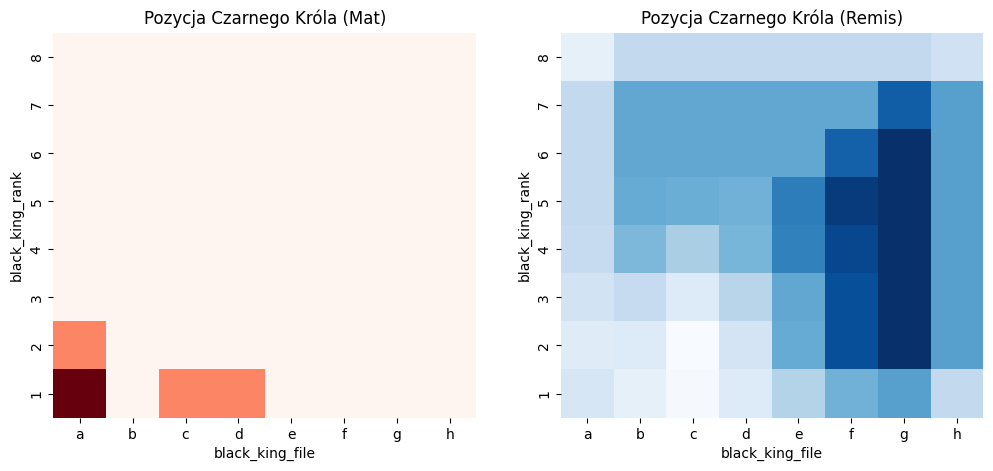

In [8]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Mat
mate_counts = df[df['depth'] == 0].groupby(['black_king_rank', 'black_king_file']).size().unstack(fill_value=0)
mate_counts = mate_counts.reindex(index=range(1, 9), columns=['a','b','c','d','e','f','g','h'], fill_value=0).sort_index(ascending=False)
sns.heatmap(mate_counts, ax=axes[0], cmap='Reds', cbar=False)
axes[0].set_title('Pozycja Czarnego Króla (Mat)')

# Remis
draw_counts = df[df['depth'] == -1].groupby(['black_king_rank', 'black_king_file']).size().unstack(fill_value=0)
draw_counts = draw_counts.reindex(index=range(1, 9), columns=['a','b','c','d','e','f','g','h'], fill_value=0).sort_index(ascending=False)
sns.heatmap(draw_counts, ax=axes[1], cmap='Blues', cbar=False)
axes[1].set_title('Pozycja Czarnego Króla (Remis)')
plt.show()

##### Lewa heatmap'a pokazuje, że gdy czarny król jest matowany najczęściej znajduje się on w lewym rogu planszy. Rzadko przy takim usytuowaniu zachodzi remis, wręcz prawie wcale co obrazuje prawa heatmapa. Remisem gra kończy się najczęsciej przy pozycji króla na polach od 2g do 6g.

#### Pytanie 2: Metryki vs Głębokość (bez remisów)

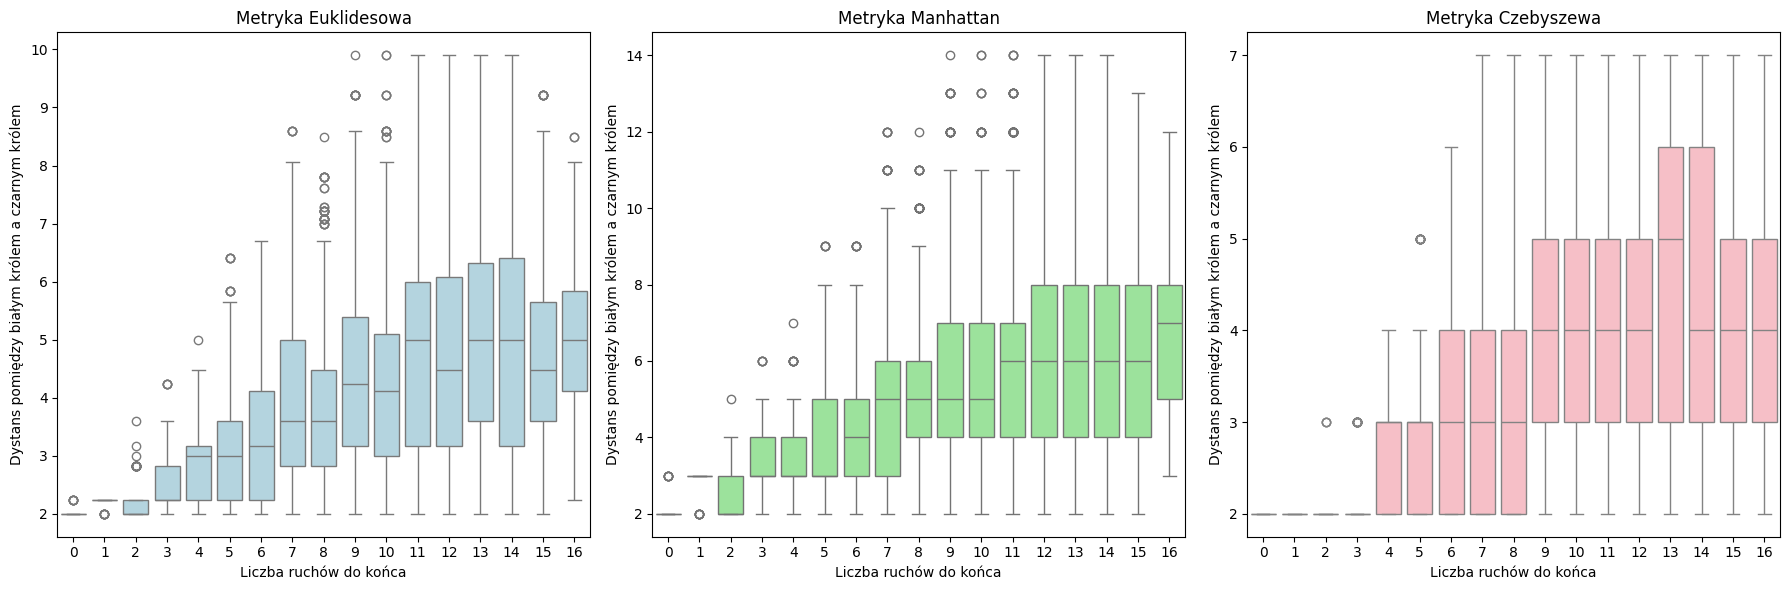

In [ ]:

df_2 = df[df['depth'] != -1]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='depth', y='dist_euclidean', data=df_2, ax=axes[0], color='lightblue')
axes[0].set_title('Metryka Euklidesowa')
axes[0].set_xlabel('Liczba ruchów do końca')
axes[0].set_ylabel('Dystans pomiędzy białym królem a czarnym królem')


sns.boxplot(x='depth', y='dist_manhattan', data=df_2, ax=axes[1], color='lightgreen')
axes[1].set_title('Metryka Manhattan')
axes[1].set_xlabel('Liczba ruchów do końca')
axes[1].set_ylabel('Dystans pomiędzy białym królem a czarnym królem')


sns.boxplot(x='depth', y='dist_chebyshev', data=df_2, ax=axes[2], color='lightpink')
axes[2].set_title('Metryka Czebyszewa')
axes[2].set_xlabel('Liczba ruchów do końca')
axes[2].set_ylabel('Dystans pomiędzy białym królem a czarnym królem')

plt.tight_layout()
plt.show()

#### Pytanie 3: Krawędź vs Głębokość

C:\Users\klemi\AppData\Local\Temp\ipykernel_26256\3688921048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bk_dist_edge', y='depth', data=df_3, ax=axes[0], palette="viridis")


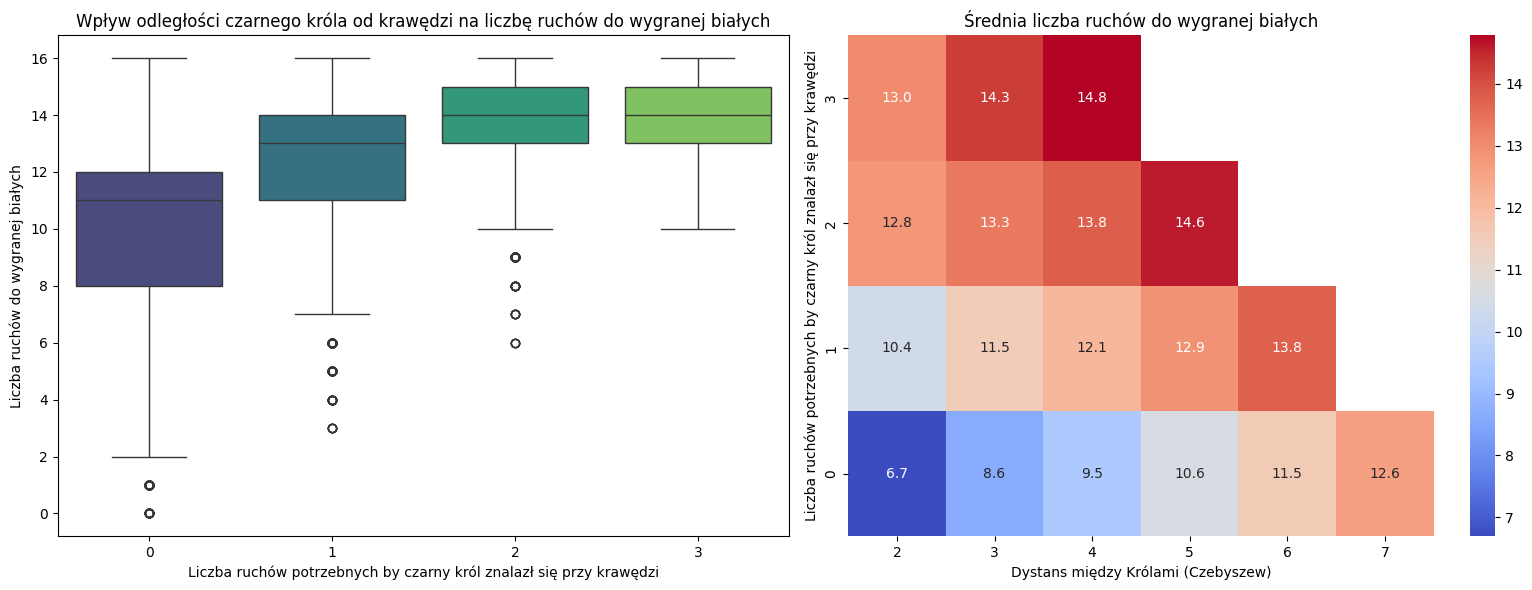

In [ ]:
df_3 = df[df['depth'] != -1].copy()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='bk_dist_edge', y='depth', data=df_3, ax=axes[0], palette="viridis")

axes[0].set_title('Wpływ odległości czarnego króla od krawędzi na liczbę ruchów do wygranej białych')
axes[0].set_xlabel('Liczba ruchów potrzebnych by czarny król znalazł się przy krawędzi')
axes[0].set_ylabel('Liczba ruchów do wygranej białych')

heatmap_data = df_3.groupby(['bk_dist_edge', 'dist_chebyshev'])['depth'].mean().unstack()
sns.heatmap(heatmap_data, ax=axes[1], cmap="coolwarm", annot=True, fmt=".1f")

axes[1].set_title('Średnia liczba ruchów do wygranej białych')
axes[1].set_ylabel('Liczba ruchów potrzebnych by czarny król znalazł się przy krawędzi')
axes[1].set_xlabel('Dystans między Królami (Czebyszew)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

##### Lewy wykres:
##### Na wykresie można zauważyć pewien trend: w miarę jak czarny król przesuwa się do centrum i oddala od krawędzi, średnia liczba ruchów do wygranej dla białych pionkow zauważalnie wzrasta. 
##### Prawy wykres:
##### Lewy dolny róg wykresu ukazuje sytuacje, gdy czarny król jest na krawędzi, a biały król jest blisko niego. Dzięki takiemu układowi średnia liczba ruchów do wygranej białych jest najniższa. Zaś prawa górna część wykresu obrazuje najtrudniejszą sytuację dla białych, czyli czarny król jest w centrum, a biały król jest daleko. Wtedy też średnia liczba ruchów do wygranej białych jest najwyższa.